In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [3]:
blobR = 21

In [4]:
npz_path = '/Users/halmamol/NEXT/NBarrays/'
npz_filename_FS = f'ntracks_FULLSIM_R21mm.npz' 
npz_filename_DS_p200 = f'ntracks_DETSIM_psf200_R21mm.npz'
npz_filename_DS_CM = f'ntracks_DETSIM_R21mm_202012.npz'

In [5]:
d_FS = np.load(npz_path+npz_filename_FS)
d_DS_CM = np.load(npz_path+npz_filename_DS_CM)
d_DS_p200 = np.load(npz_path+npz_filename_DS_p200)

nt_0nubb_FS = d_FS['ntracks_0nubb']
nt_eroi_FS = d_FS['ntracks_eroi']
nt_0nubb_DS_p200 = d_DS_p200['ntracks_0nubb']
nt_eroi_DS_p200 = d_DS_p200['ntracks_eroi']
nt_0nubb_DS_CM = d_DS_CM['ntracks_0nubb']
nt_eroi_DS_CM = d_DS_CM['ntracks_eroi']

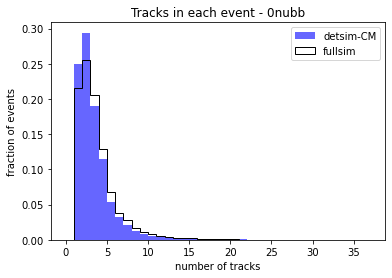

In [6]:
#Check the number of tracks with numb_of_tracks
maxtracks_0nubb = np.amax(nt_0nubb_FS)

plt.hist(nt_0nubb_DS_CM, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(nt_0nubb_FS, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb), density=True, color='black', histtype='step', label = 'fullsim')
#plt.hist(nt_0nubb_DS_p200, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('number of tracks')
plt.ylabel('fraction of events')
plt.title('Tracks in each event - 0nubb')
plt.legend(loc=1);
plt.show()

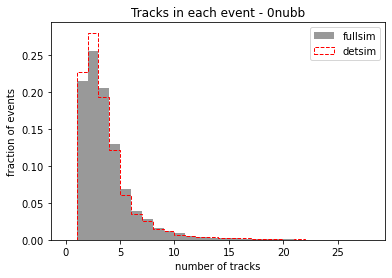

In [8]:
#Check the number of tracks with numb_of_tracks
maxtracks_0nubb = np.amax(nt_0nubb_DS_p200)

plt.hist(nt_0nubb_FS, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(nt_0nubb_DS_p200, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('number of tracks')
plt.ylabel('fraction of events')
plt.title('Tracks in each event - 0nubb')
plt.legend(loc=1);
plt.show()

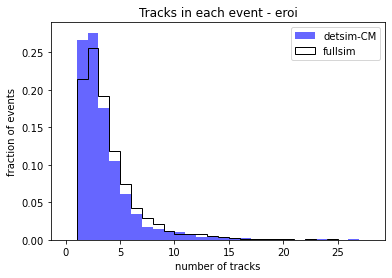

In [9]:
#Check the number of tracks with numb_of_tracks
maxtracks_eroi = np.amax(nt_eroi_FS)

plt.hist(nt_eroi_DS_CM, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb), density=True, alpha=0.6, color='b', label = 'detsim-CM')
plt.hist(nt_eroi_FS, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb), density=True, color='black', histtype='step', label = 'fullsim')
#plt.hist(nt_eroi_DS_p200, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb), density=True, color='red', histtype='step', label = 'detsim-psf200', linestyle='dashed')

plt.xlabel('number of tracks')
plt.ylabel('fraction of events')
plt.title('Tracks in each event - eroi')
plt.legend(loc=1);
plt.show()

In [ ]:
#Check the number of tracks with numb_of_tracks
maxtracks_0nubb = np.amax(nt_0nubb_DS)

plt.hist(nt_eroi_FS, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb), density=True, alpha=0.8, color='gray', label = 'fullsim')
plt.hist(nt_eroi_DS_p200, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb), density=True, color='red', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('number of tracks')
plt.ylabel('fraction of events')
plt.title('Tracks in each event - eroi')
plt.legend(loc=1);
plt.show()

In [ ]:
#Check the number of tracks with numb_of_tracks
maxtracks_0nubb = np.amax(nt_0nubb_DS)

plt.hist(nt_0nubb_FS, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb),density=True, alpha=0.6, color='orange', label = 'FULLSIM - Beerb. C-0.001 ')
plt.hist(nt_0nubb_DS, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb),density=True, alpha=0.6, color='green', label = 'DETSIM - Beerb. C-0.001 ')
plt.xlabel('number of tracks')
plt.ylabel('fraction of events')
plt.title('Tracks in each event - 0nubb')
plt.legend(loc=1);
plt.show()

In [ ]:
#Check the number of tracks with numb_of_tracks
maxtracks_0nubb = np.amax(nt_0nubb_DS_tb)

plt.hist(nt_0nubb_FS_tb, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb),density=True, alpha=0.6, color='orange', label = 'FULLSIM - Beerb. N-0.1 ')
plt.hist(nt_0nubb_DS_tb, bins = maxtracks_0nubb, range = (0, maxtracks_0nubb),density=True, alpha=0.6, color='green', label = 'DETSIM - Beerb. N-0.1')
plt.xlabel('number of tracks')
plt.ylabel('fraction of events')
plt.title('Tracks in each event - 0nubb')
plt.legend(loc=1);
plt.show()